<a href="https://colab.research.google.com/github/RobSal82/Curso-Data-Science-2/blob/main/ProyectoDS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Abstracto:
En el siguiente trabajo analizaremos las variables asociadas al proceso de abatimiento de NOx, el cual se utiliza para cumplir la normativa asociada a emisiones atmosférica, especificamente en Chile. El sistema de abatimiento de NOx estudiado, pertenece a la tecnología SCR (Selective Catalitic Reduction), el cual consiste en un sistema de inyección de amoníaco (NH3) a través de boquillas en los gases de escape, estos pasan por un reactor donde se producen las reacciones químicas por las cuales se reduce la cantidad de NOx.

# Objetivos:
El data set consiste en 7 variables extraídas desde un sistema de control distribuido (DCS) de una central termoeléctrica de carbón pulverizado la que son exportados a un formato csv. Las variables extraídas tienen directa relación con el proceso, con lo cual se busca obtener un modelo predictivo para el cálculo de emisiones (NOx), siguiendo los siguientes pasos:
•	Importar data set a Python.
•	Determinar parámetros estadísticos (cantidad de datos, tipos de datos, promedio, entre otros).
•	Verificar calidad de datos (Existencia de datos perdidos y/o outliner)
•	Limpieza da datos previos a análisis (Aplicación de técnicas sustitución o eliminación de datos)
•	Verificar u observar distribuciones de los datos (Visualizar mediante gráficos).
•	Analizar correlaciones con la variable objetivo (Método numérico y grafico utilizando scatter_matrix)
•	Aplicar modelo regresión lineal ( en primera instancia)
•	Análisis de resultados obtenidos (Cálculo mSe y r2, simulación de algunos datos).
•	Análisis de futuras mejoras del modelo .

# Hipótesis:
Confirmar que la generación de NOx en la salida (posterior a la combustión) depende proporcionalmente a carga de unidad (MW) y depende inversamente con el flujo de amoniaco ingresado, ya que se utiliza para abatirlo.

# **Carga de aplicaciones a utilizar**

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Carga de dataset desde Gibhub**

In [ ]:
url = "https://raw.githubusercontent.com/RobSal82/Curso-Data-Science-2/refs/heads/main/DSetNOx.csv"
df = pd.read_csv(url) # Lectura de Data Set

# **Análisis de Dataset**

In [ ]:
df.info() # Información de columnas, cantidad y tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date                                            52560 non-null  object 
 1   NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01  52560 non-null  float64
 2   NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01   52560 non-null  float64
 3   REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01  52560 non-null  float64
 4   CEMS O2- 05HTA04CQ206||XQ01                     52560 non-null  float64
 5   CEMS NOx- 05HTA04CQ202||XQ01                    52560 non-null  float64
 6   ACTUAL MW- 05CJD02ED001||ZV08                   52560 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [ ]:
df # Visualización de los 5 primeras filas y 5 ultimas

,Date,NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01,NH3 MIXER INLET NH3 FLOW- 05HSJ90CF201||XQ01,REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01,CEMS O2- 05HTA04CQ206||XQ01,CEMS NOx- 05HTA04CQ202||XQ01,ACTUAL MW- 05CJD02ED001||ZV08
0,2021-05-01 12:00:00,1.518584,67.897643,184.924381,5.782891,102.379270,350.50320
1,2021-05-01 12:10:00,1.517903,67.814884,169.793016,5.745294,102.569275,351.60900
2,2021-05-01 12:20:00,1.518287,67.745415,171.796342,5.746246,104.443565,351.58100
3,2021-05-01 12:30:00,1.509049,71.100860,177.743340,5.731077,101.045690,352.02716
4,2021-05-01 12:40:00,1.511150,71.945179,177.810891,5.750410,97.436530,351.45853
...,...,...,...,...,...,...,...
52555,2022-04-30 11:10:00,1.550615,44.300064,185.821987,9.188021,46.895702,250.35231
52556,2022-04-30 11:20:00,1.550467,44.083046,187.918275,9.215579,46.548397,249.54178
52557,2022-04-30 11:30:00,1.551676,44.079849,185.928546,9.218519,46.444023,249.45532
52558,2022-04-30 11:40:00,1.549272,44.101070,188.875395,9.203307,46.186970,249.90273


In [ ]:
df.describe() #Estadisticas de variables

,NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01,NH3 MIXER INLET NH3 FLOW- 05HSJ90CF201||XQ01,REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01,CEMS O2- 05HTA04CQ206||XQ01,CEMS NOx- 05HTA04CQ202||XQ01,ACTUAL MW- 05CJD02ED001||ZV08
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,1.417989,59.642457,187.881516,9.490703,67.147968,241.439845
std,0.189201,24.193862,13.296870,3.707400,28.543381,108.926745
min,0.139389,-2.499023,162.481736,4.723520,-0.156740,-0.059653
25%,1.391876,47.888692,176.124908,5.823011,46.421837,135.194357
50%,1.466503,63.118027,186.225800,9.167444,73.558575,250.954020
75%,1.521045,71.635933,200.230945,13.080313,91.125953,349.325230
max,4.310561,184.954040,228.803419,18.701482,196.860460,358.365840


In [ ]:
df.isnull().sum() #Verificación de valores nulos

,0
Date,0
NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01,0
NH3 MIXER INLET NH3 FLOW- 05HSJ90CF201||XQ01,0
REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01,0
CEMS O2- 05HTA04CQ206||XQ01,0
CEMS NOx- 05HTA04CQ202||XQ01,0
ACTUAL MW- 05CJD02ED001||ZV08,0


# **Limpieza de data (NAN y Outliner)**

El data set no tiene valores nulos, sin embargo. El valor mínimo para la variable ACTUAL MW- 05CJD02ED001||ZV08 es -0.059653, dicha carga equivale a periodos que no esta generando la unidad, por la cual se eliminarán los datos valores cercanos a cero, y por temas de estabilidad del proceso térmico se eliminarán la data en el rango de carga de valores menores a 10 MW (ya que la data en ese rango no es confiable).

In [ ]:
df.drop(df[df["ACTUAL MW- 05CJD02ED001||ZV08"] < 10].index, inplace=True) # Eliminación datos para carga menor a 10 MW
df.reset_index(drop=True, inplace=True) # Reseteo de indice
df.info() # Resumen de cantidad de datos y columnas
df.describe() #Estadisticas de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49294 entries, 0 to 49293
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date                                            49294 non-null  object 
 1   NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01  49294 non-null  float64
 2   NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01   49294 non-null  float64
 3   REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01  49294 non-null  float64
 4   CEMS O2- 05HTA04CQ206||XQ01                     49294 non-null  float64
 5   CEMS NOx- 05HTA04CQ202||XQ01                    49294 non-null  float64
 6   ACTUAL MW- 05CJD02ED001||ZV08                   49294 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


,NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01,NH3 MIXER INLET NH3 FLOW- 05HSJ90CF201||XQ01,REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01,CEMS O2- 05HTA04CQ206||XQ01,CEMS NOx- 05HTA04CQ202||XQ01,ACTUAL MW- 05CJD02ED001||ZV08
count,49294.000000,49294.000000,49294.000000,49294.000000,49294.000000,49294.000000
mean,1.457825,63.729390,185.986056,8.947208,71.083349,257.435058
std,0.090442,18.842254,11.219221,3.141597,24.224726,92.378165
min,0.139389,-2.494252,162.481736,4.723520,-0.156740,10.717056
25%,1.405411,51.327395,175.923852,5.815689,49.425947,166.590937
50%,1.475585,64.430546,184.746853,9.064285,76.206285,253.985345
75%,1.522842,72.215663,197.027728,12.040205,91.652185,349.540152
max,4.310561,184.954040,223.289888,17.335620,196.860460,358.365840


**Distribuciones de los datos**

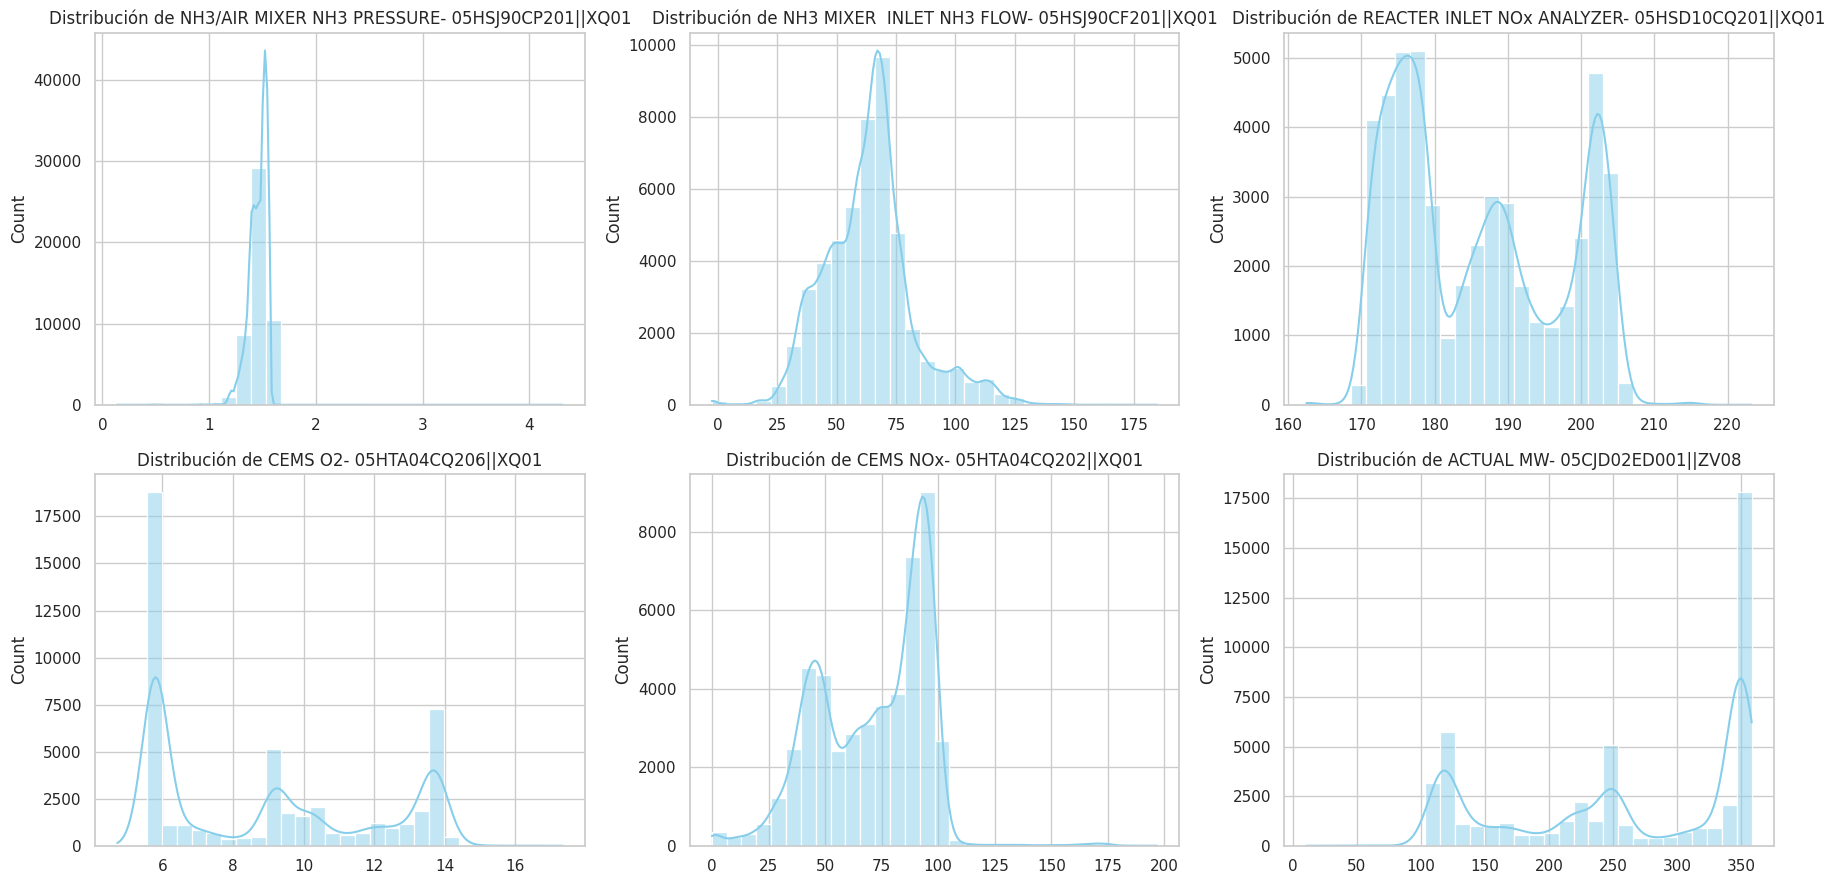

In [ ]:
# Configuramos un estilo más limpio
sns.set_theme(style="whitegrid")

# Usamos iteración para tener control total
cols = df.select_dtypes(include=['number']).columns
n_cols = 3
n_rows = (len(cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, len(cols) * 1.5))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", bins=30)
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_xlabel('')

# Eliminamos ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

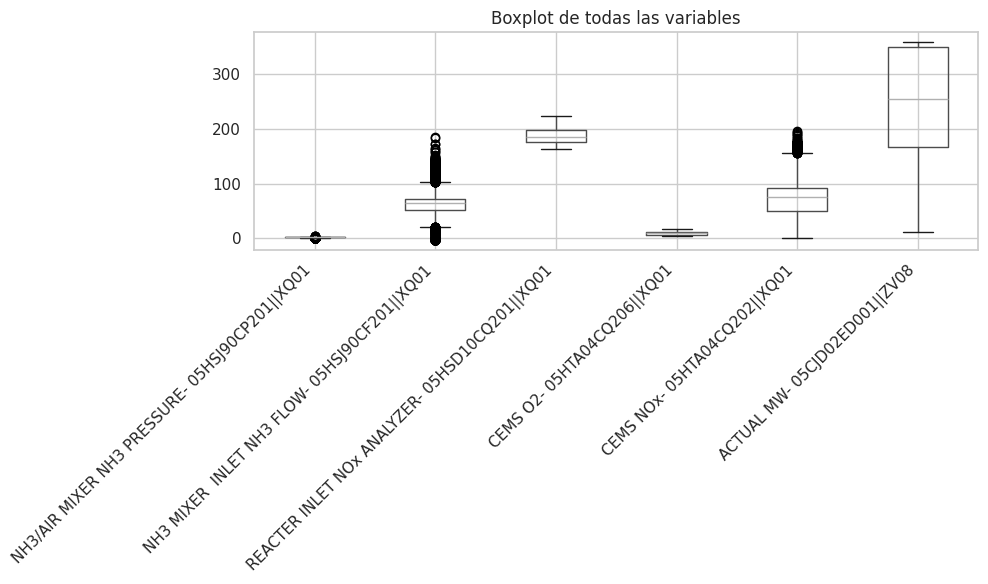

In [ ]:
# Crear el boxplot (visualizar los Outliner)
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
df.boxplot()
plt.title('Boxplot de todas las variables')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el espacio entre elementos del gráfico
plt.show()

En el análisis de outliner se identifican principalmente en variables: NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01 y CEMS NOx- 05HTA04CQ202||XQ01. Sin embargo, los valores positivos no son de preocupación, los negativos (errores en la extracción de data, los valores de flujo negativos no existen en el proceso) se reemplazarán por valores predecesores ya que la data se saco con intervalos temporal de 10 minutos y el valor anterior es representativo.

In [ ]:
df['NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01']=df['NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01'].apply(lambda x:np.nan if x<=0 else x)  # Reemplazo valores menor a cero por np.nan
df['NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01']=df['NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01'].interpolate(method='nearest') # Reemplazo valores np.nan por el valor interpolado más cercano
df['CEMS NOx- 05HTA04CQ202||XQ01']=df['CEMS NOx- 05HTA04CQ202||XQ01'].apply(lambda x:np.nan if x<=0 else x) # Reemplazo valores menor a cero por np.nan
df['CEMS NOx- 05HTA04CQ202||XQ01']=df['CEMS NOx- 05HTA04CQ202||XQ01'].interpolate(method='nearest') # Reemplazo valores np.nan por el valor interpolado más cercano
df.describe()

,NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01,NH3 MIXER INLET NH3 FLOW- 05HSJ90CF201||XQ01,REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01,CEMS O2- 05HTA04CQ206||XQ01,CEMS NOx- 05HTA04CQ202||XQ01,ACTUAL MW- 05CJD02ED001||ZV08
count,49294.000000,49294.000000,49294.000000,49294.000000,49294.000000,49294.000000
mean,1.457825,63.778387,185.986056,8.947208,71.118201,257.435058
std,0.090442,18.722962,11.219221,3.141597,24.170453,92.378165
min,0.139389,0.365587,162.481736,4.723520,0.004841,10.717056
25%,1.405411,51.342226,175.923852,5.815689,49.445667,166.590937
50%,1.475585,64.432136,184.746853,9.064285,76.218400,253.985345
75%,1.522842,72.216473,197.027728,12.040205,91.655370,349.540152
max,4.310561,184.954040,223.289888,17.335620,196.860460,358.365840


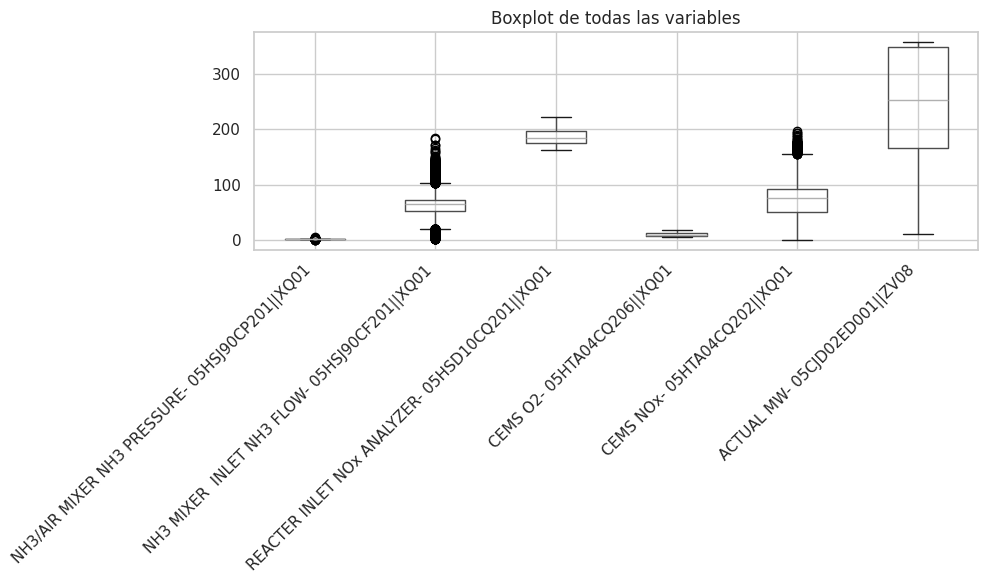

In [ ]:
# Crear el boxplot con valores corregidos
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura (opcional)
df.boxplot()
plt.title('Boxplot de todas las variables')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x (opcional)
plt.tight_layout()  # Ajustar el espacio entre elementos del gráfico (opcional)
plt.show()

# **Correlaciones de variables**

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr() #Matriz de correlaciones solo variables numericos (Excluye date)

In [ ]:
correlation_matrix['CEMS NOx- 05HTA04CQ202||XQ01'].sort_values(ascending=False) #Correlaciones respecto a variable objetivo CEMS NOx- 05HTA04CQ202||XQ01

,CEMS NOx- 05HTA04CQ202||XQ01
CEMS NOx- 05HTA04CQ202||XQ01,1.000000
ACTUAL MW- 05CJD02ED001||ZV08,0.801976
NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01,-0.129976
NH3 MIXER INLET NH3 FLOW- 05HSJ90CF201||XQ01,-0.251782
REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01,-0.784738
CEMS O2- 05HTA04CQ206||XQ01,-0.801841


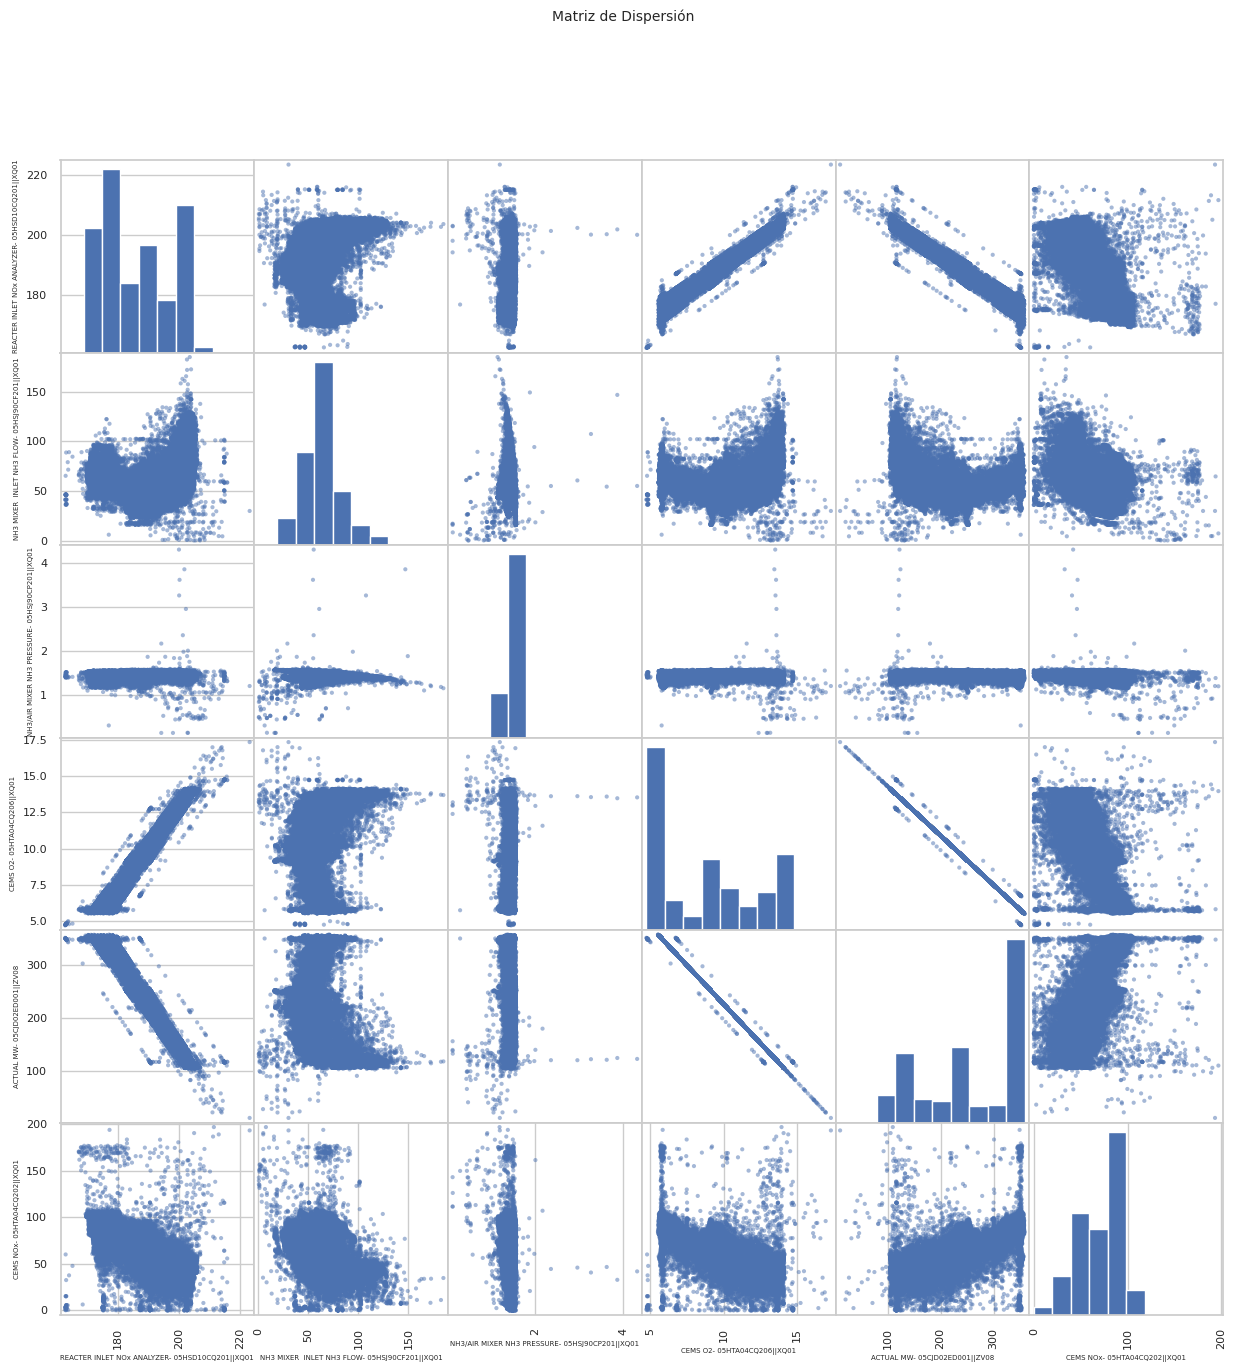

In [ ]:
attributes=["REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01","NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01","NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01","CEMS O2- 05HTA04CQ206||XQ01","ACTUAL MW- 05CJD02ED001||ZV08","CEMS NOx- 05HTA04CQ202||XQ01"]
scatter_matrix_fig = scatter_matrix(df[attributes], figsize=(15, 15), diagonal='hist', alpha=0.5) # Metodo grafico de visualización de correlaciones

# Personalizar el tamaño de las etiquetas
for ax in scatter_matrix_fig.ravel():
    ax.xaxis.label.set_fontsize(5)  # Tamaño de las etiquetas del eje x
    ax.yaxis.label.set_fontsize(5)  # Tamaño de las etiquetas del eje y

# Mostrar el gráfico
plt.suptitle("Matriz de Dispersión", fontsize=10)  # Título general del gráfico
plt.show()

**Se confirman las hipotesis**
La generación de NOx en la salida variable "CEMS NOx- 05HTA04CQ202||XQ01" depende proporcionalmente a carga de unidad (ACTUAL MW- 05CJD02ED001||ZV08) inversamente con el flujo de amoniaco ingresado (NH3 MIXER INLET NH3 FLOW- 05HSJ90CF201||XQ01	), ya que se utiliza para abatirlo.
Por otro lado la variable "NH3/AIR MIXER NH3 PRESSURE- 05HSJ90CP201||XQ01", tiene influencia casi nula en la produccion de NOx, por lo cual se descartará del modelo.

# **Selección y evaluación del modelo**

In [ ]:
df2= df.select_dtypes(include=['number']) # Se excluye la variable date

***Modelo Regresión Lineal***

In [ ]:
Y=df2["CEMS NOx- 05HTA04CQ202||XQ01"]  # Variable objetivo (dependiente)
X = df2[['NH3 MIXER  INLET NH3 FLOW- 05HSJ90CF201||XQ01',
         'REACTER INLET NOx ANALYZER- 05HSD10CQ201||XQ01',
         'CEMS O2- 05HTA04CQ206||XQ01',
         'ACTUAL MW- 05CJD02ED001||ZV08']]# Variables independientes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # División conjunto de datos para entrenar 20% para test
# Crear el modelo de regresión lineal
model = LinearRegression(fit_intercept=True)

# Ajustar el modelo a los datos
model.fit(X_train, Y_train)

# Predicciones del modelo
Y_pred = model.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("mean_squared_error:",mse)
print("r2_score:",r2)

mean_squared_error: 188.6119809592174
r2_score: 0.67446871840633


**Prueba de datos conjunto test**

In [ ]:
data_prueba1=X_test.iloc[5:15] # Datos filas 5 a 15
resultados_prueba1=Y_test.iloc[5:15] # Datos filas 5 a 15
print("Predicciones",model.predict(data_prueba1))

Predicciones [43.5688415  90.29266041 90.29877577 37.05540999 45.45086763 51.91087197
 90.76589399 88.29790158 92.33789428 71.02109043]


In [ ]:
print("Resultados",list(resultados_prueba1))

Resultados [39.887535, 91.31884, 85.49656, 50.691425, 41.07173, 48.46331, 88.20919, 90.18788, 94.37757, 59.25806]


**Conclusión:** Respecto al modelo utilizado para predecir la variable "CEMS NOx- 05HTA04CQ202||XQ01", que corresponde a una correlación lineal tiene un r2 de 0,67 corresponde a una correlación alta, pero puede ser mejorable. Por lo cual se buscará un modelo que tenga mejores resultados.